In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
summary_df = pd.read_csv("benchmark_summary.csv")
summary_df

,timestamp,strategy,num_clients,requests_per_client,request_interval_ms,total_benchmark_time_s,total_requests_attempted,total_results_logged,successful_requests,success_rate_percent,throughput_rps,avg_latency_ms,p50_latency_ms,p90_latency_ms,p95_latency_ms,p99_latency_ms
0,2025-05-16 11:54:12,round_robin,10,20,50,10.46,200,200,200,100.0,19.13,407.20,191.07,1095.92,1162.79,1235.07
1,2025-05-16 11:54:36,least_loaded,10,20,50,15.36,200,200,200,100.0,13.02,667.54,652.91,1270.66,1391.35,1515.57
2,2025-05-16 11:55:08,ewma,10,20,50,23.33,200,200,200,100.0,8.57,1054.83,1130.26,1505.94,1638.57,1764.47


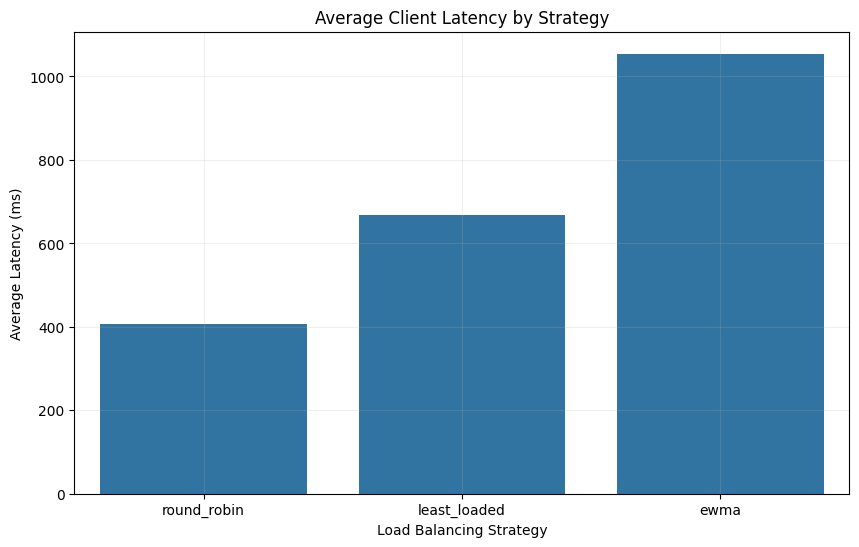

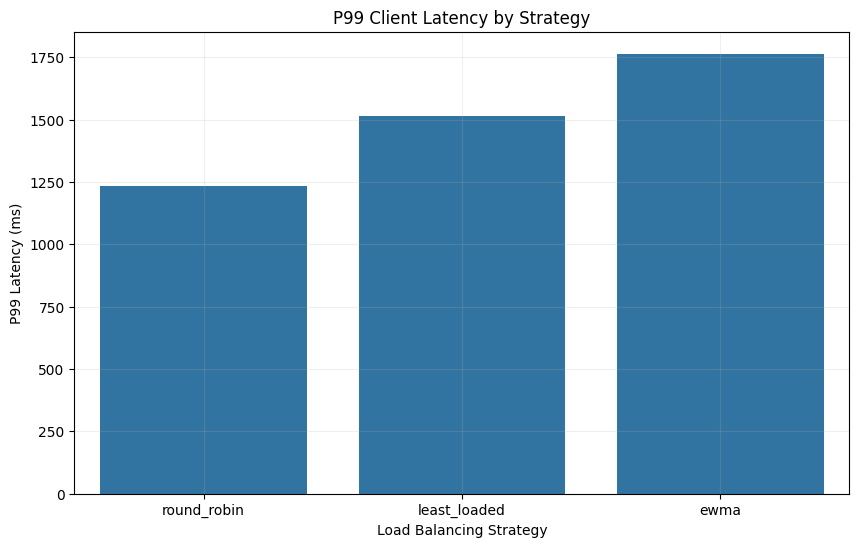

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="strategy", y="avg_latency_ms", data=summary_df)
plt.title("Average Client Latency by Strategy")
plt.ylabel("Average Latency (ms)")
plt.xlabel("Load Balancing Strategy")
plt.grid(":", alpha = 0.2)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="strategy", y="p99_latency_ms", data=summary_df)
plt.title("P99 Client Latency by Strategy")
plt.ylabel("P99 Latency (ms)")
plt.xlabel("Load Balancing Strategy")
plt.grid(":", alpha = 0.2)
plt.show()


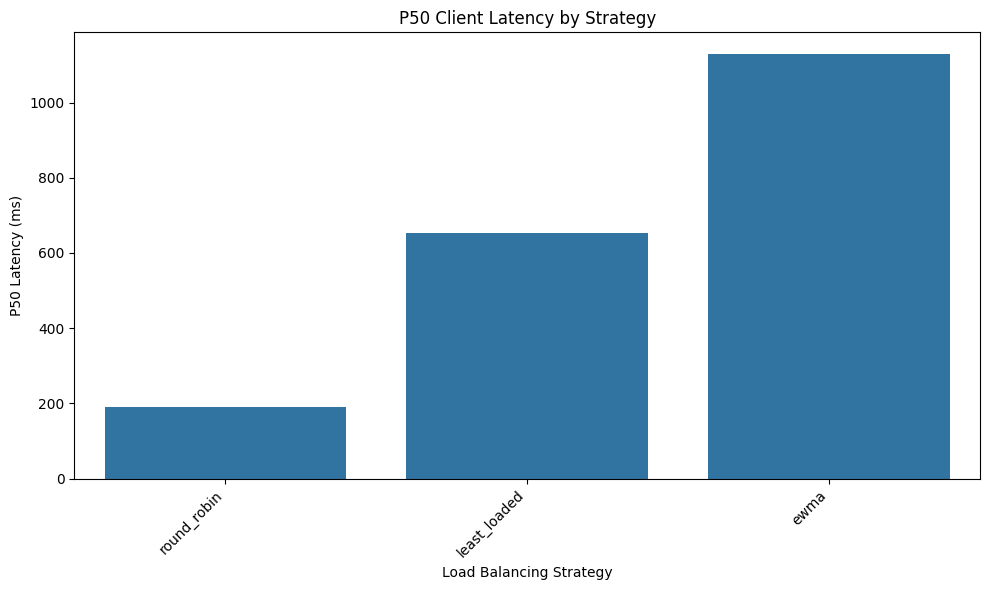

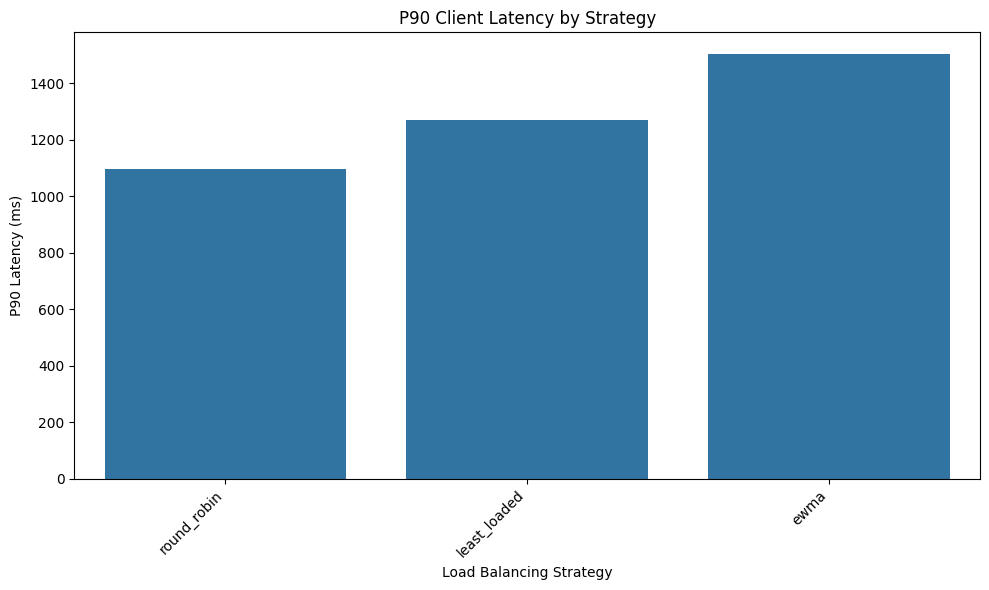

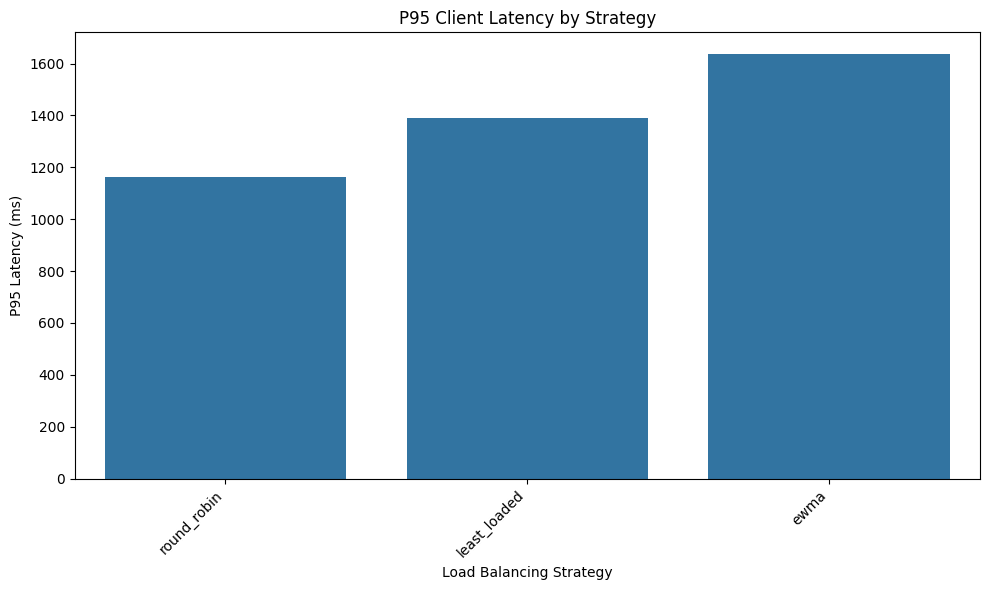

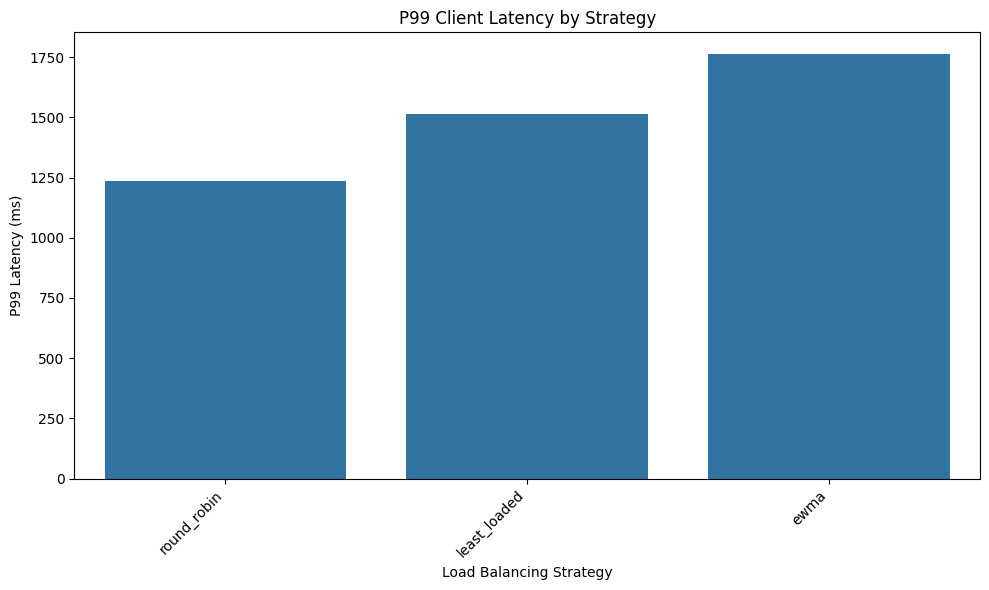

In [ ]:
for p_metric in ["p50_latency_ms", "p90_latency_ms", "p95_latency_ms", "p99_latency_ms"]:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="strategy", y=p_metric, data=summary_df)
    percentile = p_metric.split('_')[0].upper()
    plt.title(f"{percentile} Client Latency by Strategy")
    plt.ylabel(f"{percentile} Latency (ms)")
    plt.xlabel("Load Balancing Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

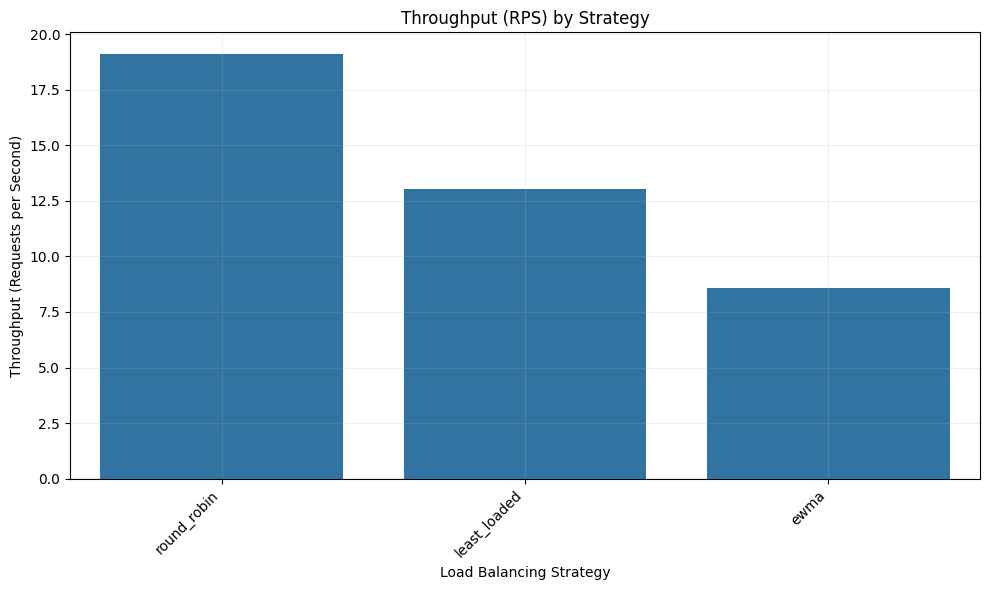

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x="strategy", y="throughput_rps", data=summary_df)
plt.title("Throughput (RPS) by Strategy")
plt.ylabel("Throughput (Requests per Second)")
plt.xlabel("Load Balancing Strategy")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(":", alpha = 0.2)
plt.show()

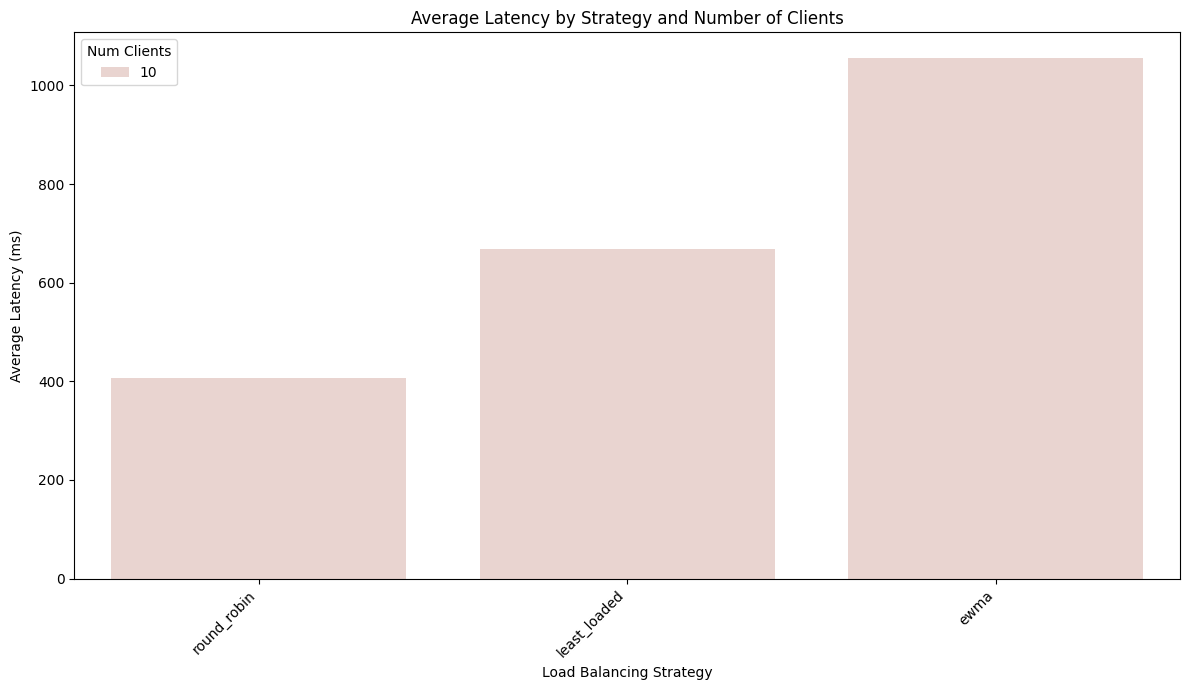

In [16]:
plt.figure(figsize=(12, 7))
sns.barplot(x="strategy", y="avg_latency_ms", hue="num_clients", data=summary_df)
plt.title("Average Latency by Strategy and Number of Clients")
plt.ylabel("Average Latency (ms)")
plt.xlabel("Load Balancing Strategy")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Num Clients")
plt.tight_layout()
plt.show()